# 二値分類

In [67]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display

np.set_printoptions(suppress=True, precision=4)
pd.options.display.float_format = '{:.4f}'.format
pd.set_option("display.max_columns", None)
plt.rcParams["font.size"] = 14
random_seed = 123

In [68]:
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

# 決定境界の表示関数
def plot_boundary(ax, x, y, algorithm):
    x_train, x_test, y_train, y_test = train_test_split(x, y,
            test_size=0.5, random_state=random_seed)
    # カラーマップ定義
    cmap1 = plt.cm.bwr
    cmap2 = ListedColormap(['#0000FF', '#000000'])

    h = 0.005
    algorithm.fit(x_train, y_train)
    score_test = algorithm.score(x_test, y_test)
    score_train = algorithm.score(x_train, y_train)
    f1_min = x[:, 0].min() - 0.5
    f1_max = x[:, 0].max() + 0.5
    f2_min = x[:, 1].min() - 0.5
    f2_max = x[:, 1].max() + 0.5
    f1, f2 = np.meshgrid(np.arange(f1_min, f1_max, h),
                         np.arange(f2_min, f2_max, h))
    if hasattr(algorithm, "decision_function"):
        Z = algorithm.decision_function(np.c_[f1.ravel(), f2.ravel()])
        Z = Z.reshape(f1.shape)
        ax.contour(f1, f2, Z, levels=[0], linewidth=2)
    else:
        Z = algorithm.predict_proba(np.c_[f1.ravel(), f2.ravel()])[:, 1]
        Z = Z.reshape(f1.shape)
    ax.set_aspect(1)
    ax.contourf(f1, f2, Z, cmap=cmap1, alpha=0.3)
    ax.scatter(x_test[:,0], x_test[:,1], c=y_test, cmap=cmap2)
    ax.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap=cmap2, marker='x')
    text = f'test: {score_test:.2f}  train: {score_train:.2f}'
    ax.text(f1.max() - 0.3, f2.min() + 0.3, text, horizontalalignment='right',
    fontsize=14)

def plot_boundaries(algorithm, DataList):
    plt.figure(figsize=(10, 10))
    #N = len(DataList)
    for i, data in enumerate(DataList):
        X, y = data
        ax = plt.subplot(1, N, i+1)
        plot_boundary(ax, X, y, algorithm)
        ax.set_xlim(X[:, 0].min(), X[:, 0].max())
        ax.set_ylim(X[:, 1].min(), X[:, 1].max())
    plt.show()

## 典型的なデータセット生成

In [69]:
from sklearn.datasets import make_classification
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles

X1, y1 = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=random_seed, n_clusters_per_class=1, n_samples=200, n_classes=2)
X2, y2 = make_moons(noise=0.05, random_state=random_seed, n_samples=200)
X3, y3 = make_circles(noise=0.02, random_state=random_seed, n_samples=200)

DataList = [(X1, y1), (X2, y2), (X3, y3)]
N = len(DataList)


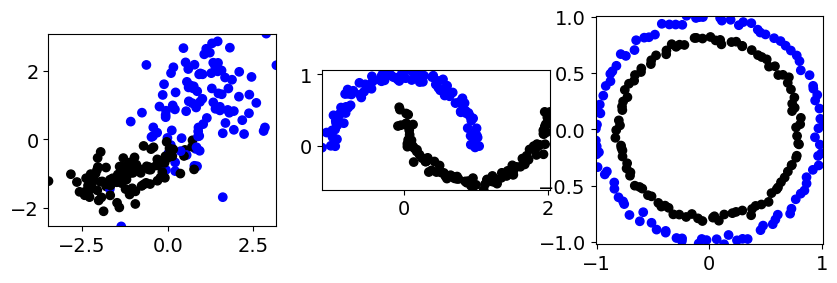

In [81]:
plt.figure(figsize=(10, 4))

from matplotlib.colors import ListedColormap

cmap = ListedColormap(['#0000FF', '#000000'])

for ii, data in enumerate(DataList):
    X, y = data
    ax = plt.subplot(1, N, ii + 1)
    ax.set_aspect(1)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)
    ax.set_xlim(X[:, 0].min(), X[:, 0].max())
    ax.set_ylim(X[:, 1].min(), X[:, 1].max())

## ロジスティック回帰

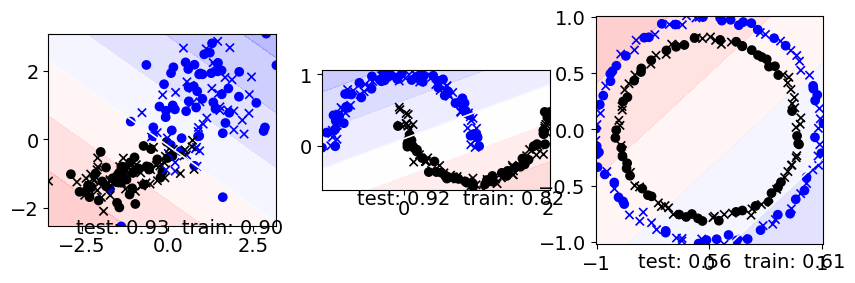

In [71]:
from sklearn.linear_model import LogisticRegression

algorithm = LogisticRegression(random_state=random_seed)

plot_boundaries(algorithm, DataList)

## サポートベクターマシン

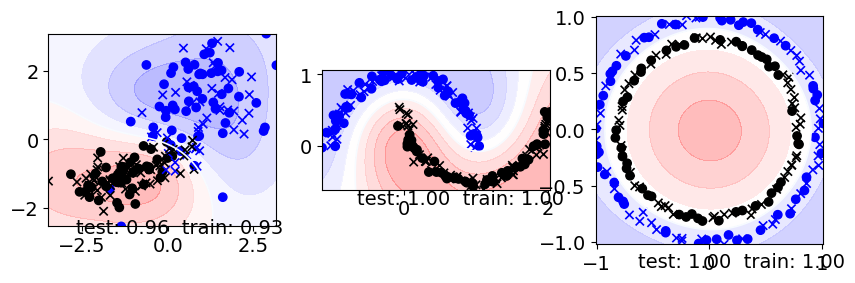

In [72]:
from sklearn.svm import SVC

algorithm = SVC(kernel='rbf')

plot_boundaries(algorithm, DataList)

## ニューラルネットワーク

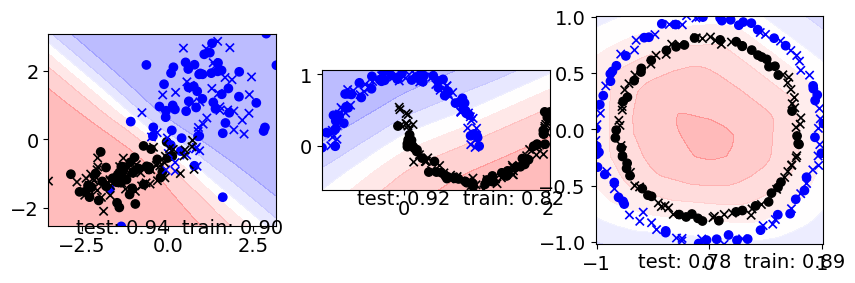

In [73]:
from sklearn.neural_network import MLPClassifier

algorithm = MLPClassifier(random_state=random_seed)

plot_boundaries(algorithm, DataList)

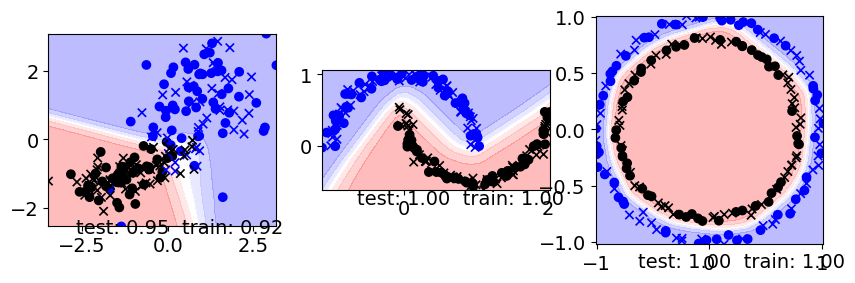

In [74]:
algorithm = MLPClassifier(hidden_layer_sizes=(100, 100), random_state=random_seed)

plot_boundaries(algorithm, DataList)

## 決定木

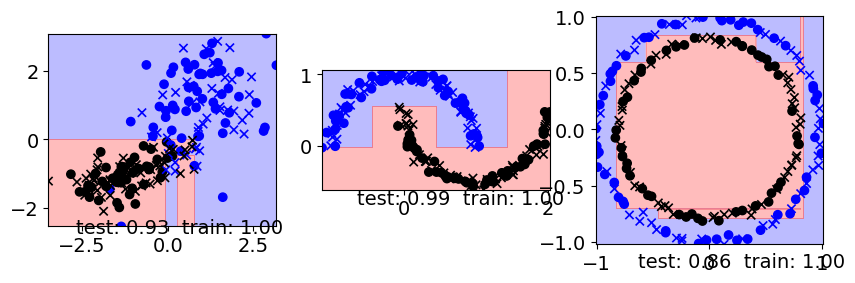

In [75]:
from sklearn.tree import DecisionTreeClassifier

algorithm = DecisionTreeClassifier(random_state=random_seed)

plot_boundaries(algorithm, DataList)

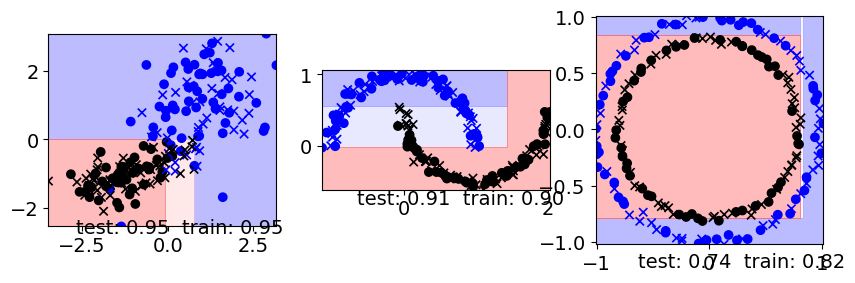

In [76]:
algorithm = DecisionTreeClassifier(max_depth=3, random_state=random_seed)

plot_boundaries(algorithm, DataList)

## ランダムフォレスト

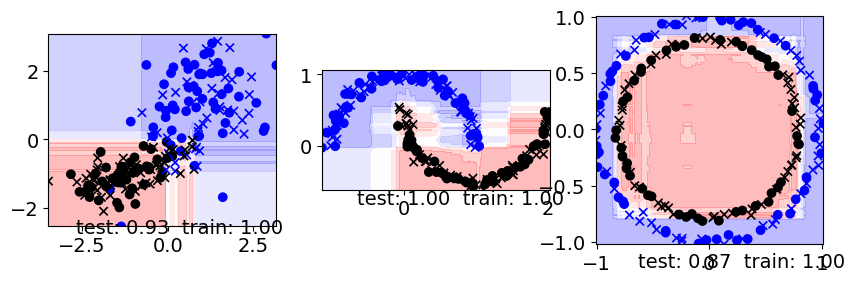

In [77]:
from sklearn.ensemble import RandomForestClassifier

algorithm = RandomForestClassifier(random_state=random_seed)

plot_boundaries(algorithm, DataList)

## XGBoost

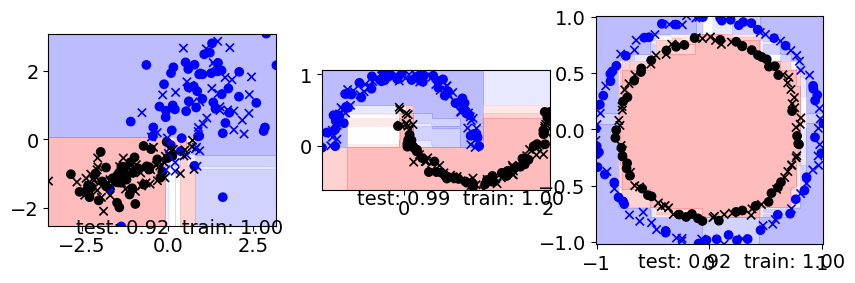

In [78]:
import xgboost

algorithm = xgboost.XGBClassifier(random_state=random_seed)

plot_boundaries(algorithm, DataList)